<a href="https://colab.research.google.com/github/carive47/Finances/blob/main/technical_forecasting/CASO_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=86d35db4efba1bbf08789c2e459fcc32e4f7628806bd1459ce724757fa7c2a9f
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt
 # libreria de velas japonesas

import mplfinance as mpf

#libreria de analisis técnico
import ta


In [ ]:
# datos btc
df=yfin.download('BTC-USD', start='2021-06-01', end='2024-11-29', interval = '1d')
#EMAs
df['EMA5']=df['Adj Close'].rolling(window=5).mean()
df['EMA20']=df['Adj Close'].rolling(window=20).mean()
#construccion senales
N=len(df)
signals=[0]

for i in range(1, N):
    cinco = df['EMA5'].iloc[i]
    veinte = df['EMA20'].iloc[i]
    a_cinco = df['EMA5'].iloc[i-1]
    a_veinte = df['EMA20'].iloc[i-1]

    if a_cinco < a_veinte and cinco > veinte:
        signals.append(1)  # Señal de compra
    elif a_cinco > a_veinte and cinco < veinte:
        signals.append(-1)  # Señal de venta
    else:
        signals.append(0)  # Sin señal

df['signals'] = signals
#df = df.reset_index(level='Ticker', drop=True)
df


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,EMA5,EMA20,signals
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,
Date,,,,,,,,,
2021-06-01 00:00:00+00:00,36684.925781,36684.925781,37896.734375,35787.085938,37293.792969,34639423297,NaN,NaN,0
2021-06-02 00:00:00+00:00,37575.179688,37575.179688,38231.339844,35966.308594,36699.921875,33070867190,NaN,NaN,0
2021-06-03 00:00:00+00:00,39208.765625,39208.765625,39478.953125,37243.972656,37599.410156,35460750427,NaN,NaN,0
2021-06-04 00:00:00+00:00,36894.406250,36894.406250,39242.484375,35717.722656,39242.484375,41831090187,NaN,NaN,0
2021-06-05 00:00:00+00:00,35551.957031,35551.957031,37917.714844,34900.414062,36880.156250,35959473399,37183.046875,NaN,0
...,...,...,...,...,...,...,...,...,...
2024-11-24 00:00:00+00:00,98013.820312,98013.820312,98647.179688,95788.078125,97778.093750,51712020623,97526.596875,87559.183594,0
2024-11-25 00:00:00+00:00,93102.296875,93102.296875,98935.031250,92642.914062,98033.445312,80909462490,97279.157812,88746.320312,0


In [ ]:
df.columns = df.columns.droplevel('Ticker')
print(df.index.names)  # Nombres de los niveles de índice
print(df.columns)
df

['Date']
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'EMA5', 'EMA20',
       'signals'],
      dtype='object', name='Price')


Price,Adj Close,Close,High,Low,Open,Volume,EMA5,EMA20,signals
Date,,,,,,,,,
2021-06-01 00:00:00+00:00,36684.925781,36684.925781,37896.734375,35787.085938,37293.792969,34639423297,NaN,NaN,0
2021-06-02 00:00:00+00:00,37575.179688,37575.179688,38231.339844,35966.308594,36699.921875,33070867190,NaN,NaN,0
2021-06-03 00:00:00+00:00,39208.765625,39208.765625,39478.953125,37243.972656,37599.410156,35460750427,NaN,NaN,0
2021-06-04 00:00:00+00:00,36894.406250,36894.406250,39242.484375,35717.722656,39242.484375,41831090187,NaN,NaN,0
2021-06-05 00:00:00+00:00,35551.957031,35551.957031,37917.714844,34900.414062,36880.156250,35959473399,37183.046875,NaN,0
...,...,...,...,...,...,...,...,...,...
2024-11-17 00:00:00+00:00,89845.851562,89845.851562,91433.039062,88741.664062,90558.460938,46350159305,89860.985937,78563.192187,0
2024-11-18 00:00:00+00:00,90542.640625,90542.640625,92596.789062,89393.593750,89843.718750,75535775084,89852.681250,79454.299609,0
2024-11-19 00:00:00+00:00,92343.789062,92343.789062,94002.867188,90426.984375,90536.812500,74521048295,90871.353125,80454.512109,0


In [ ]:
from matplotlib import markers
#senales
df['buy'] = np.where(df['signals'] == 1, df['Adj Close'], np.nan)
df['sell'] = np.where(df['signals'] == -1, df['Adj Close'], np.nan)

df

Price,Adj Close,Close,High,Low,Open,Volume,EMA5,EMA20,signals,buy,sell
Date,,,,,,,,,,,
2021-06-01 00:00:00+00:00,36684.925781,36684.925781,37896.734375,35787.085938,37293.792969,34639423297,NaN,NaN,0,NaN,NaN
2021-06-02 00:00:00+00:00,37575.179688,37575.179688,38231.339844,35966.308594,36699.921875,33070867190,NaN,NaN,0,NaN,NaN
2021-06-03 00:00:00+00:00,39208.765625,39208.765625,39478.953125,37243.972656,37599.410156,35460750427,NaN,NaN,0,NaN,NaN
2021-06-04 00:00:00+00:00,36894.406250,36894.406250,39242.484375,35717.722656,39242.484375,41831090187,NaN,NaN,0,NaN,NaN
2021-06-05 00:00:00+00:00,35551.957031,35551.957031,37917.714844,34900.414062,36880.156250,35959473399,37183.046875,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-17 00:00:00+00:00,89845.851562,89845.851562,91433.039062,88741.664062,90558.460938,46350159305,89860.985937,78563.192187,0,NaN,NaN
2024-11-18 00:00:00+00:00,90542.640625,90542.640625,92596.789062,89393.593750,89843.718750,75535775084,89852.681250,79454.299609,0,NaN,NaN
2024-11-19 00:00:00+00:00,92343.789062,92343.789062,94002.867188,90426.984375,90536.812500,74521048295,90871.353125,80454.512109,0,NaN,NaN


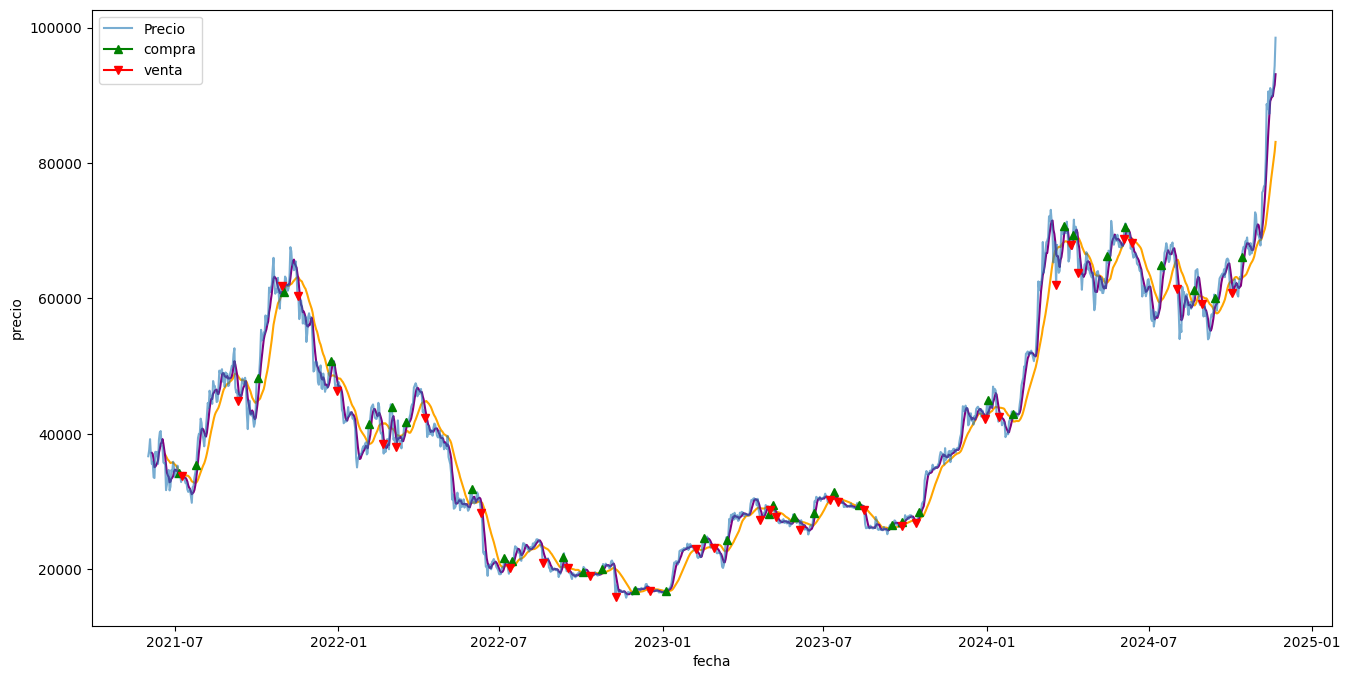

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['EMA20'], color ='orange')
plt.plot(df['EMA5'], color='purple')
plt.plot(df['Adj Close'],label='Precio', alpha=0.6)
plt.plot(df['buy'], marker='^', color='green', label='compra')
plt.plot(df['sell'], marker='v', color='red', label='venta')
plt.legend(loc='upper left')
plt.xlabel('fecha')
plt.ylabel('precio')
plt.show()

In [ ]:
# Backtesting
N = len(df)
equity = [100]

TP = 0.2
SL = 0.01

pos = 0
price  = 0

for i in range (1, N):

  equity.append(equity[i-1])

  if pos == 1:
    if df['Close'][i] >= price*(1+TP):
      pos = 0
      equity[i] *= (1+TP)
    elif df['Close'][i] <= price*(1-SL):
      pos=0
      equity[i] *= (1-SL)

  elif pos == -1:
    if df['Close'][i] <= price*(1-TP):
      pos=0
      equity[i] *= (1+TP)
    elif df['Close'][i] >= price*(1+SL):
      pos=0
      equity[i] *= (1-SL)

  else:

    if  df['signals'][i] != 0:
      pos = df['signals'][i]
      precio = df['Close'][i]

df['equity']=equity
df



<ipython-input-10-0354552d1702>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if  df['signals'][i] != 0:
<ipython-input-10-0354552d1702>:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos = df['signals'][i]
<ipython-input-10-0354552d1702>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  precio = df['Close'][i]
<ipython-input-10-0354552d1702>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a

Price,Adj Close,Close,High,Low,Open,Volume,EMA5,EMA20,signals,buy,sell,equity
Date,,,,,,,,,,,,
2021-06-01 00:00:00+00:00,36684.925781,36684.925781,37896.734375,35787.085938,37293.792969,34639423297,NaN,NaN,0,NaN,NaN,100.000000
2021-06-02 00:00:00+00:00,37575.179688,37575.179688,38231.339844,35966.308594,36699.921875,33070867190,NaN,NaN,0,NaN,NaN,100.000000
2021-06-03 00:00:00+00:00,39208.765625,39208.765625,39478.953125,37243.972656,37599.410156,35460750427,NaN,NaN,0,NaN,NaN,100.000000
2021-06-04 00:00:00+00:00,36894.406250,36894.406250,39242.484375,35717.722656,39242.484375,41831090187,NaN,NaN,0,NaN,NaN,100.000000
2021-06-05 00:00:00+00:00,35551.957031,35551.957031,37917.714844,34900.414062,36880.156250,35959473399,37183.046875,NaN,0,NaN,NaN,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-17 00:00:00+00:00,89845.851562,89845.851562,91433.039062,88741.664062,90558.460938,46350159305,89860.985937,78563.192187,0,NaN,NaN,41550.420431
2024-11-18 00:00:00+00:00,90542.640625,90542.640625,92596.789062,89393.593750,89843.718750,75535775084,89852.681250,79454.299609,0,NaN,NaN,41550.420431
2024-11-19 00:00:00+00:00,92343.789062,92343.789062,94002.867188,90426.984375,90536.812500,74521048295,90871.353125,80454.512109,0,NaN,NaN,41550.420431


In [ ]:
# Backtesting con registro de TP y SL
N = len(df)
equity = [100]

TP = 0.2
SL = 0.01

pos = 0
price = 0
take_profit = [None] * N
stop_loss = [None] * N

for i in range(1, N):
    equity.append(equity[i - 1])  # Inicialmente, mantenemos el equity igual

    if pos == 1:  # Posición larga
        if df['Close'][i] >= price * (1 + TP):  # Toma de ganancia en largo
            pos = 0
            equity[i] *= (1 + TP)
            take_profit[i] = df['Close'][i]
        elif df['Close'][i] <= price * (1 - SL):  # Stop Loss en largo
            pos = 0
            equity[i] *= (1 - SL)
            stop_loss[i] = df['Close'][i]

    elif pos == -1:  # Posición corta
        if df['Close'][i] <= price * (1 - TP):  # Toma de ganancia en corto
            pos = 0
            equity[i] *= (1 + TP)
            take_profit[i] = df['Close'][i]
        elif df['Close'][i] >= price * (1 + SL):  # Stop Loss en corto
            pos = 0
            equity[i] *= (1 - SL)
            stop_loss[i] = df['Close'][i]

    else:
        if df['signals'][i] != 0:
            pos = df['signals'][i]
            price = df['Close'][i]  # Actualizamos el precio de entrada

df['equity'] = equity
df['take_profit'] = take_profit
df['stop_loss'] = stop_loss

<ipython-input-11-fbd5a459a804>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['signals'][i] != 0:
<ipython-input-11-fbd5a459a804>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos = df['signals'][i]
<ipython-input-11-fbd5a459a804>:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price = df['Close'][i]  # Actualizamos el precio de entrada
<ipython-input-11-fbd5a459a804>:17: FutureWarning: Series.__getitem__ treating ke

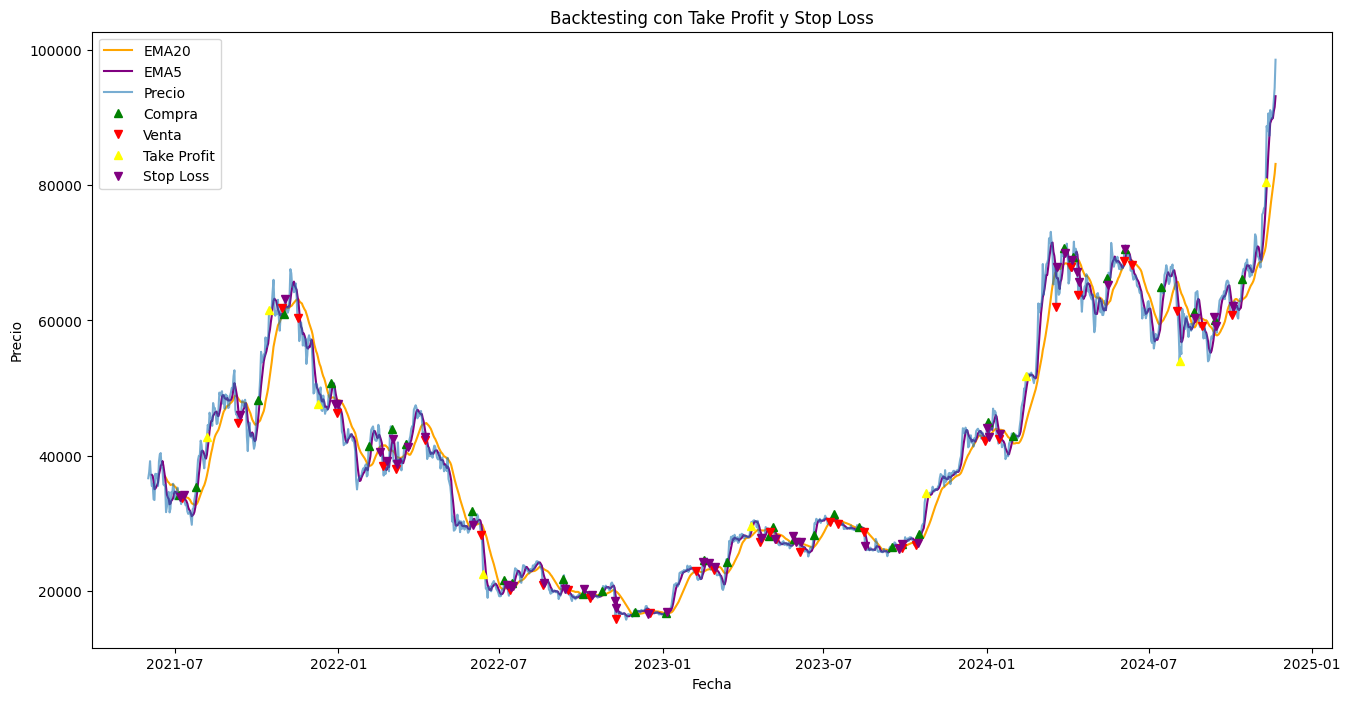

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.plot(df['EMA20'], color='orange', label='EMA20')
plt.plot(df['EMA5'], color='purple', label='EMA5')
plt.plot(df['Adj Close'], label='Precio', alpha=0.6)
plt.plot(df['buy'], marker='^', color='green', label='Compra', linestyle='None')
plt.plot(df['sell'], marker='v', color='red', label='Venta', linestyle='None')

# Marcadores de Take Profit
plt.plot(df.index, df['take_profit'], marker='^', color='yellow', linestyle='None', label='Take Profit')

# Marcadores de Stop Loss
plt.plot(df.index, df['stop_loss'], marker='v', color='purple', linestyle='None', label='Stop Loss')

plt.legend(loc='upper left')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Backtesting con Take Profit y Stop Loss')
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Crear una figura base con las líneas principales
fig = px.line(
    df,
    x=df.index,
    y=['EMA20', 'EMA5', 'Adj Close'],
    labels={'value': 'Precio', 'index': 'Fecha'},
    title='Backtesting con Take Profit y Stop Loss'
)

# Agregar marcadores para "Compra" y "Venta"
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['buy'],
    mode='markers',
    marker=dict(color='green', symbol='triangle-up', size=10),
    name='Compra'
))
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['sell'],
    mode='markers',
    marker=dict(color='red', symbol='triangle-down', size=10),
    name='Venta'
))

# Agregar marcadores para "Take Profit" y "Stop Loss"
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['take_profit'],
    mode='markers',
    marker=dict(color='yellow', symbol='triangle-up', size=10),
    name='Take Profit'
))
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['stop_loss'],
    mode='markers',
    marker=dict(color='purple', symbol='triangle-down', size=10),
    name='Stop Loss'
))

# Ajustar diseño
fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Precio',
    legend_title='Indicadores',
    template='plotly_white'
)

# Mostrar la gráfica
fig.show()


In [ ]:
# prompt: quiero saber cuantas posiciones buy hay y cuantas sell hay

buy_count = df['signals'].value_counts().get(1, 0)
sell_count = df['signals'].value_counts().get(-1, 0)

print(f"Número de señales de compra (buy): {buy_count}")
print(f"Número de señales de venta (sell): {sell_count}")

Número de señales de compra (buy): 37
Número de señales de venta (sell): 36


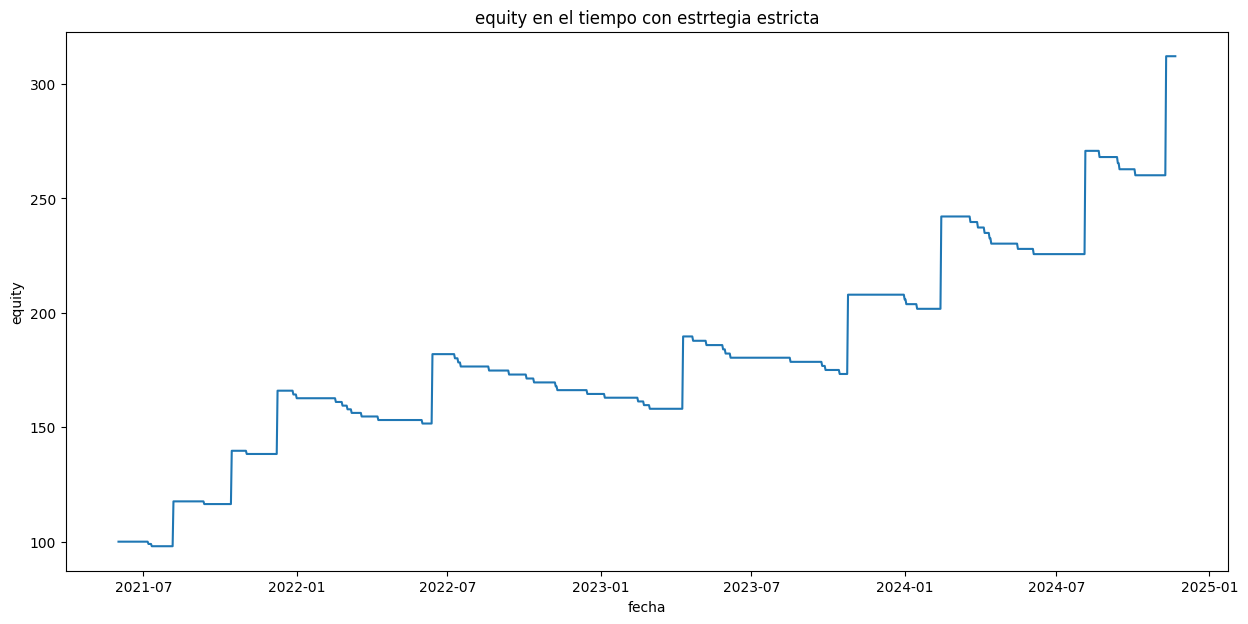

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(df['equity'], label='equity')
plt.xlabel('fecha')
plt.ylabel('equity')
plt.title('equity en el tiempo con estrtegia estricta')
plt.show()

In [ ]:
                      # Retorno logaritmico
ret = np.log(df['equity']).diff().mean()
ret*=252
#volatilidad
vol = np.log(df['equity']).diff().std()
vol *= np.sqrt(252)
vol

rf = 0.3

sharpe_ratio = (ret-rf)/vol
sharpe_ratio

1.9655349057632023

## **Prueba**

[*********************100%***********************]  1 of 1 completed


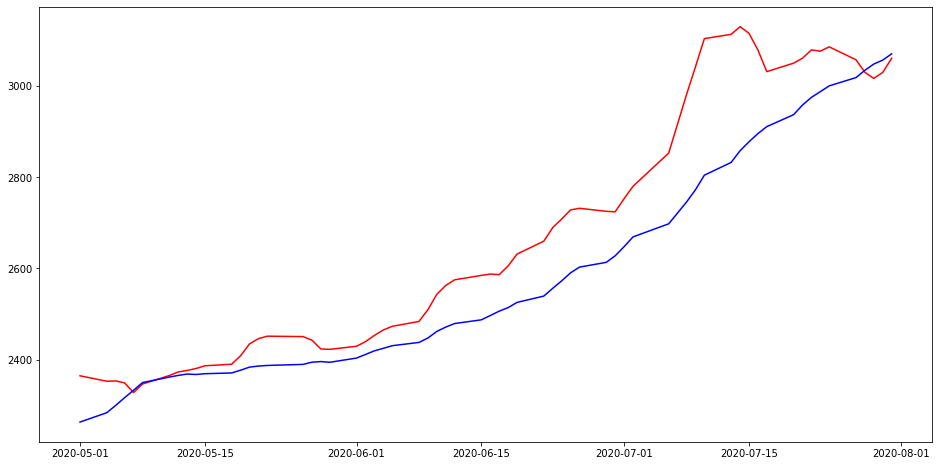

In [ ]:
plt.figure(figsize=(16,8))
amz = yfin.download('AMZN', start = '2020-01-01', end = '2021-12-31')
amz['ema_20'] = amz['Close'].rolling(20).mean()
amz['ema_5'] = amz['Close'].rolling(5).mean()

plt.plot(amz['ema_5']['2020-05-01':'2020-08-01'], color = 'red')
plt.plot(amz['ema_20']['2020-05-01':'2020-08-01'], color = 'blue')
plt.show()